## Load the Data

You can download the data from (here){https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences}

### Author : JP


In [11]:
import pandas as pd, numpy as np
import tensorflow_datasets as tfds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
# Load the IMDb dataset
imdb_ds = tfds.load('imdb_reviews', split='train')
dataset = pd.read_csv('imdb_labelled.txt', sep ='\t', header = None, names = ['reviews', 'rating'])
dataset

,reviews,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


Fill all NAN values with 1.

In [13]:
dataset.dropna(inplace=True)
dataset.fillna(1, inplace = True)

## Text pre-processing

1. Remove stopwords
1. Lemmatize
1. Tokenize

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jayap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jayap\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
def text_preprocess(ds: pd.Series) -> pd.Series:
    for m in range(len(ds)):
        
        main_words = re.sub('[^a-zA-Z]', ' ', ds[m])                                      # Retain only alphabets
        main_words = (main_words.lower()).split()
        main_words = [w for w in main_words if not w in set(stopwords.words('english'))]  # Remove stopwords
        
        lem = WordNetLemmatizer()
        main_words = [lem.lemmatize(w) for w in main_words if len(w) > 1]                 # Group different forms of the same word
        
        main_words = ' '.join(main_words)
        ds[m] = main_words

    return ds

dataset['reviews'] = text_preprocess(dataset['reviews'])

C:\Users\jayap\AppData\Local\Temp\ipykernel_48600\1859571077.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[m] = main_words
C:\Users\jayap\AppData\Local\Temp\ipykernel_48600\1859571077.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[m] = main_words
C:\Users\jayap\AppData\Local\Temp\ipykernel_48600\1859571077.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[m] = main_words
C:\Users\jayap\AppData\Local\Temp\ipyker

## A simple EDA

In [16]:
!pip install wordcloud

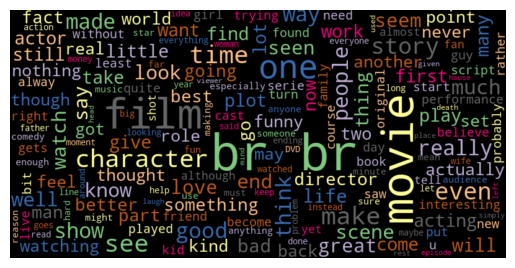

In [26]:
import tensorflow_datasets as tfds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the IMDb dataset
imdb_ds = tfds.load('imdb_reviews', split='train')

# Extract reviews
reviews = ' '.join(review['text'].numpy().decode('utf-8') for review in imdb_ds)

# Function to generate word cloud
def generateWordCloud(corpus, cmap):
    """
    Return a Word Cloud object generated from the corpus and color map parameter.
    """
    wordcloud = WordCloud(background_color='black', width=800, height=400,
                          colormap=cmap, max_words=180, contour_width=3,
                          max_font_size=80, contour_color='steelblue',
                          random_state=0)

    wordcloud.generate(corpus)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    return wordcloud

# Generate and save word cloud
generateWordCloud(corpus=reviews, cmap='Accent').to_file('imdb_wc.png')


## Prepare the dataset

1. Split into features and label
1. TF-IDF vectorization
1. split to train and test set

In [27]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)


## Classification

1. Select the model
1. Train
1. Evaluate

In [35]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

In [36]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy:  0.7644444444444445

Classification Report

               precision    recall  f1-score   support

           0       0.86      0.65      0.74       116
           1       0.70      0.89      0.79       109

    accuracy                           0.76       225
   macro avg       0.78      0.77      0.76       225
weighted avg       0.78      0.76      0.76       225

